In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('terrorismData.csv')
df

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [4]:
df.isnull().sum()


Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Target           636
Summary        66129
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [5]:
df=df.fillna({'Latitude':df['Latitude'].mean(),'Longitude':df['Longitude'].mean(),'Killed':df['Killed'].mean(),'Wounded':df['Wounded'].mean()})

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

2461

In [8]:
df.drop_duplicates(inplace = True)

In [39]:
df=df.reset_index(drop=True)

QUESTION 1

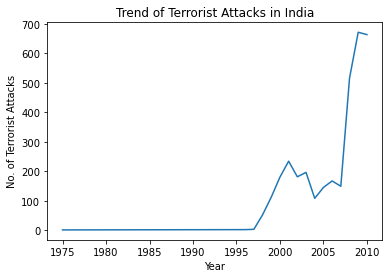

In [34]:
end=df[(df['Year']==2011)&(df['Month']==1)&(df['Day']==1)].index[0]-1
#till2010 = terror.loc[:end2010]
#till2010 = till2010[till2010['Country'] == 'India']
t2010=df.loc[:end][df.loc[:end]['Country']=='India']
trend=t2010['Year'].value_counts().sort_values()
sns.lineplot(x=trend.index,y=trend.values)
plt.xlabel("Year")
plt.ylabel('No. of Terrorist Attacks')
plt.title("Trend of Terrorist Attacks in India")
plt.show()

QUESTION 2

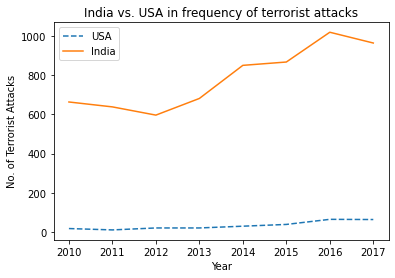

In [37]:
st=df[(df['Year'] == 2010) & (df['Month'] == 1)&(df['Day'] == 1)].index[0]
fr=df.loc[st:]
US=fr[fr['Country'] == 'United States']
India=fr[fr['Country']=='India']
yu= US['Year'].value_counts().sort_values()
yi= India['Year'].value_counts().sort_values()
sns.lineplot(x=yu.index,y=yu.values , label = 'USA',linestyle ='--')
sns.lineplot(x=yi.index,y=yi.values , label = 'India',linestyle ='-')
plt.xlabel("Year")
plt.ylabel('No. of Terrorist Attacks')
plt.title("India vs. USA in frequency of terrorist attacks")
plt.legend(labels = ['USA','India'], loc = 'upper left')
plt.show()

QUESTION 3

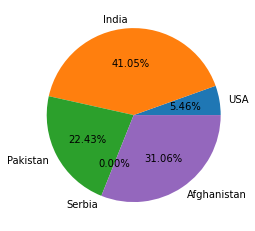

In [41]:
st =df[(df['Year'] == 2000) & (df['Month'] == 1) & (df['Day'] == 1)].index[0]
end =df[(df['Year'] == 2008) & (df['Month'] == 1) & (df['Day'] == 1)].index[0] - 1
inter=df.loc[st:end]
Usa=inter[inter['Country']=='United States']
Ind=inter[inter['Country']=='India']
Pak=inter[inter['Country']=='Pakistan']
Ser=inter[inter['Country']=='Serbia']
Afg=inter[inter['Country']=='Afghanistan']
UsTot= Usa['Year'].value_counts().sum()
InTot= Ind['Year'].value_counts().sum()
PaTot= Pak['Year'].value_counts().sum()
SeTot= Ser['Year'].value_counts().sum()
AfTot= Afg['Year'].value_counts().sum()
plt.pie([UsTot,InTot,PaTot,SeTot,AfTot],labels = ['USA','India','Pakistan','Serbia','Afghanistan'] , autopct='%1.2f%%')
plt.show()